In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action= 'ignore', category=FutureWarning)
%matplotlib inline  

In [2]:
os.chdir('D:/softwares/vscode files/test/catsvsdogs')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for d in random.sample(glob.glob('cat.*'), 500):
        shutil.move(c, 'D:/softwares/vscode files/test/catsvsdogs/train/cat')
    for d in random.sample(glob.glob('dog.*'), 500):
        shutil.move(c, 'D:/softwares/vscode files/test/catsvsdogs/train/dog')   
    for d in random.sample(glob.glob('cat.*'), 100):
        shutil.move(c, 'D:/softwares/vscode files/test/catsvsdogs/valid/cat')
    for d in random.sample(glob.glob('dog.*'), 100):
        shutil.move(c, 'D:/softwares/vscode files/test/catsvsdogs/valid/dog')
    for d in random.sample(glob.glob('cat.*'), 50):
        shutil.move(c, 'D:/softwares/vscode files/test/catsvsdogs/test/cat')
    for d in random.sample(glob.glob('dog.*'), 50):
        shutil.move(c, 'D:/softwares/vscode files/test/catsvsdogs/test/dog')

os.chdir('../../')


    

In [3]:
train_path= 'D:/softwares/vscode files/test/catsvsdogs/train'
valid_path= 'D:/softwares/vscode files/test/catsvsdogs/valid'
test_path= 'D:/softwares/vscode files/test/catsvsdogs/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotimages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

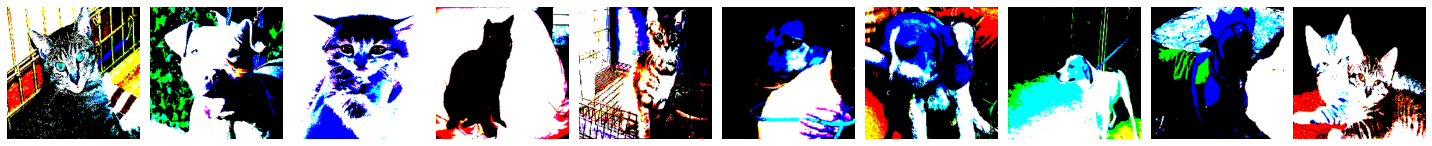

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [8]:
plotimages(imgs)
print(labels)

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 42s - loss: 26.7363 - accuracy: 0.5620 - val_loss: 6.0924 - val_accuracy: 0.6300
Epoch 2/10
100/100 - 38s - loss: 1.8638 - accuracy: 0.7710 - val_loss: 3.4419 - val_accuracy: 0.5950
Epoch 3/10
100/100 - 40s - loss: 0.6270 - accuracy: 0.8860 - val_loss: 3.1609 - val_accuracy: 0.6650
Epoch 4/10
100/100 - 39s - loss: 0.1841 - accuracy: 0.9500 - val_loss: 2.5598 - val_accuracy: 0.6250
Epoch 5/10
100/100 - 39s - loss: 0.0505 - accuracy: 0.9840 - val_loss: 2.6204 - val_accuracy: 0.6150
Epoch 6/10
100/100 - 39s - loss: 0.0055 - accuracy: 0.9980 - val_loss: 2.5436 - val_accuracy: 0.6200
Epoch 7/10
100/100 - 38s - loss: 0.0047 - accuracy: 0.9980 - val_loss: 2.6970 - val_accuracy: 0.6500
Epoch 8/10
100/100 - 39s - loss: 0.0163 - accuracy: 0.9950 - val_loss: 2.5412 - val_accuracy: 0.6350
Epoch 9/10
100/100 - 39s - loss: 0.0132 - accuracy: 0.9930 - val_loss: 2.7025 - val_accuracy: 0.6300
Epoch 10/10
100/100 - 38s - loss: 0.0018 - accuracy: 0.9990 - val_loss: 2.6066 - val_accur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

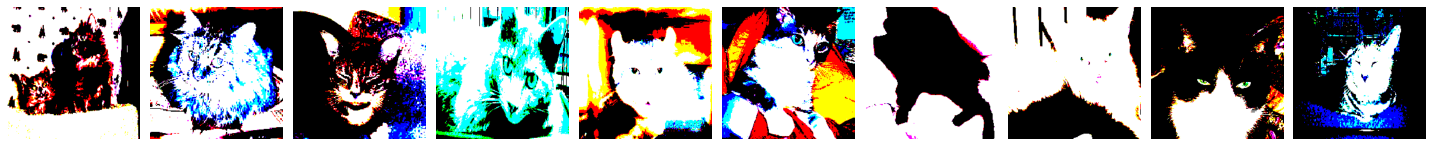

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
test_imgs, test_labels = next(test_batches)
plotimages(test_imgs)
print(test_labels)

In [14]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
predictions=model.predict(x=test_batches, verbose=0)

In [16]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [17]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis = -1))

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion_matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('normalized confusion matrix')
    else:
        print('confusion matrix, without normalization')

    print(cm)

    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

In [19]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

confusion matrix, without normalization
[[38 12]
 [17 33]]


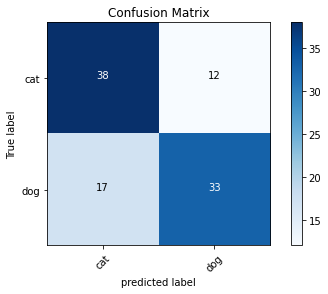

In [20]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes= cm_plot_labels, title= 'Confusion Matrix')

BUILD FINE-TUNED VGG16 MODEL

In [21]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [22]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
def count_params(model):
    non_trainable_params= np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params=np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return { 'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [24]:
params = count_params(vgg16_model)
assert params['non_trainable_params']== 0
assert params['trainable_params']==138357544

In [25]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [27]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [28]:
params = count_params(model)
assert params['non_trainable_params']== 0
assert params['trainable_params']==134260544

In [29]:
for layer in model.layers:
    layer.trainable=False

In [30]:
model.add(Dense(units=2, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:
params = count_params(model)
assert params['non_trainable_params']== 134260544
assert params['trainable_params']==8194

TRAIN THE FINE TUNED VGG16 MODEL

In [33]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics =['accuracy'])

In [34]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 201s - loss: 0.2610 - accuracy: 0.8840 - val_loss: 0.1297 - val_accuracy: 0.9550
Epoch 2/5
100/100 - 167s - loss: 0.1086 - accuracy: 0.9580 - val_loss: 0.0965 - val_accuracy: 0.9600
Epoch 3/5
100/100 - 159s - loss: 0.0800 - accuracy: 0.9720 - val_loss: 0.0774 - val_accuracy: 0.9750
Epoch 4/5
100/100 - 161s - loss: 0.0610 - accuracy: 0.9830 - val_loss: 0.0686 - val_accuracy: 0.9750
Epoch 5/5
100/100 - 157s - loss: 0.0483 - accuracy: 0.9890 - val_loss: 0.0652 - val_accuracy: 0.9750


PREDICT USING TUNED VGG16 MODEL

In [35]:
predictions = model.predict(x=test_batches, verbose=0)

In [36]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
cm= confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [38]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

confusion matrix, without normalization
[[49  1]
 [ 1 49]]


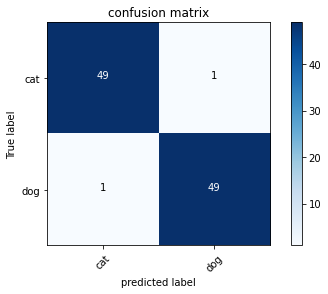

In [39]:
cm_plot_labels=['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title= 'confusion matrix')